<a href="https://colab.research.google.com/github/Srijavali/Ai-ml-projects-labs-submission/blob/main/Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Perceptron is a nueral network algorithm it is a basic unit of the nueral network and this network mimics the behaviour of nuerons in our brain.
#Perceptron takes the input and gives the out put
#perceptron is a binary classifier it decides the input belongs to which class among two classes.
# this is an array of inputs in perceptron
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [4]:
#Array of inputs along with bias
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [5]:
y = np.array([-1, -1, 1, 1, 1])

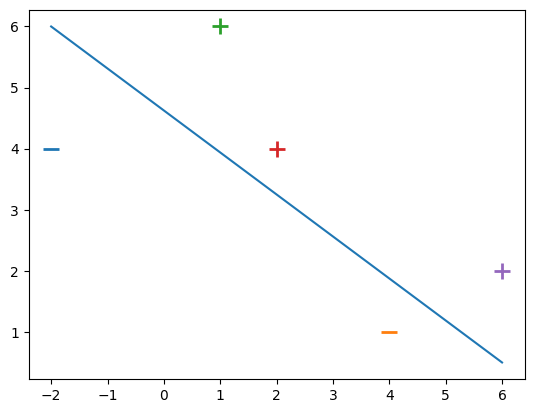

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)# s defines the size of the marker
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

In [13]:
def perceptron_algo(X, Y):# An array of datapoints(Feature matrix=X) and Y is the corresponding target variables
    w = np.zeros(len(X[0]))#initially all the weights as assigned as zeros
    eta = 1 #Learning rate
    epochs = 10 #the number of times the algorithm will loop over the entire dataset. Here, it is set to 10
    #so we can think of an epoch as one complete pass through the entire dataset.
    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:#as it is binary classification y[i] can be +1 or -1
                w = w + eta * X[i] * Y[i] #Upadation of weights when a<=0
    return w

In [19]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 20 # Total number of iterations or epochs
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

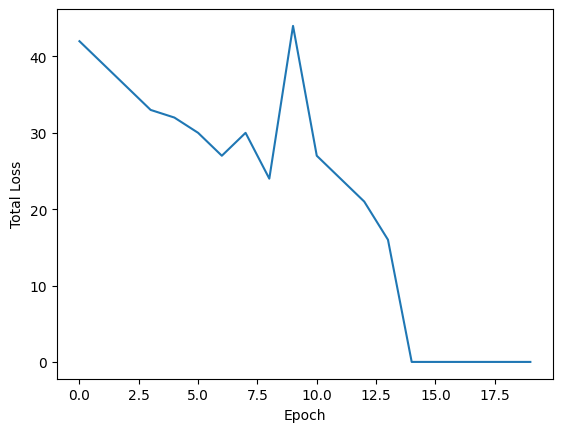

In [20]:
w = perceptron_algo_plot(X, y)

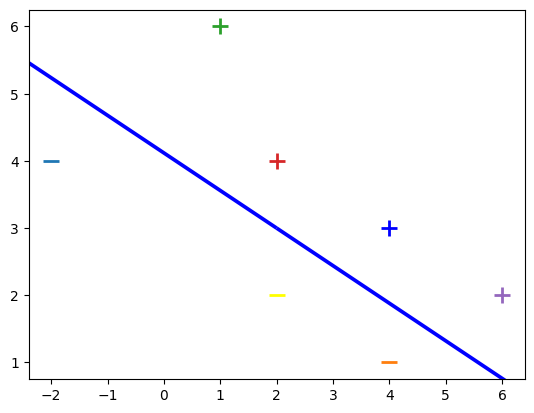

In [21]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

Final weights: [-0.03240033 -0.0321894  -0.0106678   0.01410534]


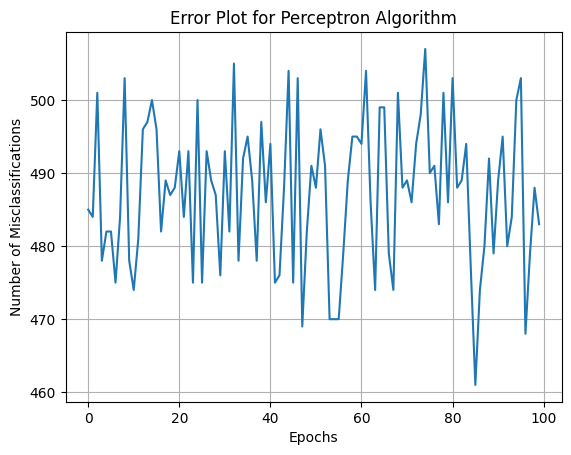

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def perceptron_algo(X, Y, eta=0.01, epochs=100):
    w = np.zeros(X.shape[1])  # Initialize weights
    errors = []  # To keep track of errors per epoch

    for epoch in range(epochs):
        errors_in_epoch = 0
        for i in range(len(X)):
            # Update weights if there is a misclassification
            # Use .iloc to access elements by position instead of label, avoiding KeyError
            if (np.dot(X[i], w) * Y.iloc[i]) <= 0:
                w = w + eta * X[i] * Y.iloc[i]
                errors_in_epoch += 1
        # Append the error count for the current epoch
        errors.append(errors_in_epoch)

    return w, errors

# Load the Banknote Authentication dataset (already preprocessed CSV)
data = fetch_openml(name='banknote-authentication', version=1)
X = data.data
y = data.target.astype(int)  # Convert target variable to integer type

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Perceptron algorithm
w, errors = perceptron_algo(X_train, y_train)

# Print the final weights
print("Final weights:", w)

# Plot the error per epoch
plt.plot(errors)
plt.title('Error Plot for Perceptron Algorithm')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()


Final weights: [-0.56927927 -0.35612584  0.24918687  0.07604332]


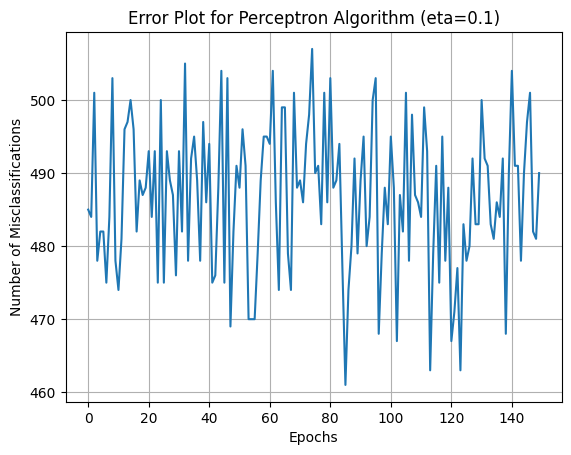

In [34]:
# Train the Perceptron algorithm with a learning rate of 0.1
eta = 0.1
w, errors = perceptron_algo(X_train, y_train, eta=eta,epochs=150)

# Print the final weights
print("Final weights:", w)

# Plot the error per epoch
plt.plot(errors)
plt.title(f'Error Plot for Perceptron Algorithm (eta={eta})')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()


Final weights: [-4.66760796 -3.79978109  2.63090827  1.98794016]


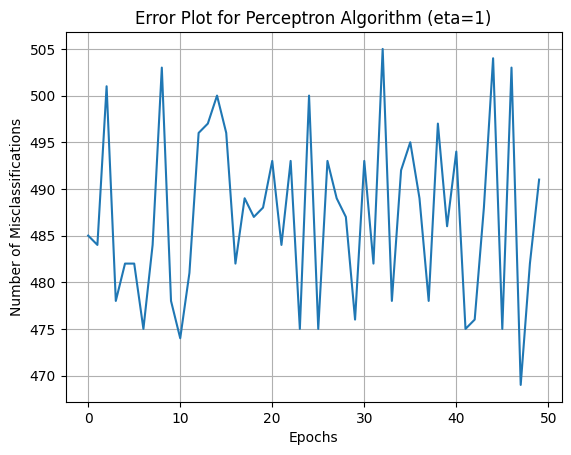

In [37]:
# Train the Perceptron algorithm with a learning rate of 1
eta = 1
w, errors = perceptron_algo(X_train, y_train, eta=eta,epochs=50)

# Print the final weights
print("Final weights:", w)

# Plot the error per epoch
plt.plot(errors)
plt.title(f'Error Plot for Perceptron Algorithm (eta={eta})')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()


If the learning rate is too high, the Perceptron algorithm might fail to converge or oscillate around the optimal solution. If it’s too low, the algorithm will converge slowly, taking a large number of epochs to reach the optimal solution.
A large eta (e.g., eta = 1 or higher) will cause the weight updates to be large, which might lead to overshooting the optimal decision boundary.
This may result in unstable convergence, where the algorithm fails to settle down and oscillates back and forth, never reaching a stable solution.
Does it Converge?: With a very large learning rate, the algorithm may not converge because the updates could be too large, missing the optimal boundary.


---
A small eta or learning rate (e.g., eta = 0.001 or lower) will result in very small weight updates. While this might prevent overshooting, the model will take a lot of epochs to converge, and the convergence will be very slow.
Does it Converge?: It will eventually converge, but it may take a longer time to reach the optimal decision boundary. The error curve will show a slow decrease over many epochs.


---
Moderate learning Rate : A balanced eta (e.g., eta = 0.01 or eta = 0.1) usually strikes a good balance between the speed of convergence and stability.
Does it Converge?: It converges relatively quickly without overshooting, provided that the data is linearly separable.



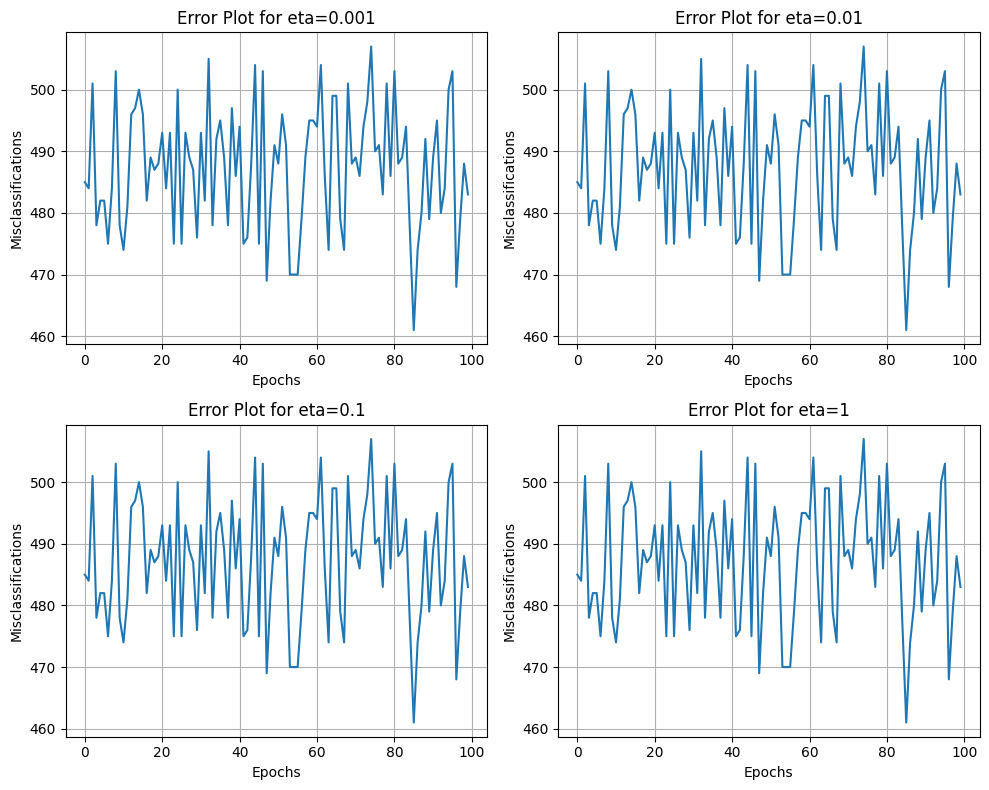

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def perceptron_algo(X, Y, eta=0.01, epochs=100):
    w = np.zeros(X.shape[1])  # Initialize weights
    errors = []  # To keep track of errors per epoch

    for epoch in range(epochs):
        errors_in_epoch = 0
        for i in range(len(X)):
            # Update weights if there is a misclassification
            if (np.dot(X[i], w) * Y.iloc[i]) <= 0:
                w = w + eta * X[i] * Y.iloc[i]
                errors_in_epoch += 1
        # Append the error count for the current epoch
        errors.append(errors_in_epoch)

    return w, errors

# Load the Banknote Authentication dataset (already preprocessed CSV)
data = fetch_openml(name='banknote-authentication', version=1)
X = data.data
y = data.target.astype(int)  # Convert target variable to integer type

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set of learning rates to test
learning_rates = [0.001, 0.01, 0.1, 1]

# Create subplots for each learning rate
plt.figure(figsize=(10, 8))

for idx, eta in enumerate(learning_rates):
    w, errors = perceptron_algo(X_train, y_train, eta=eta, epochs=100)
    plt.subplot(2, 2, idx + 1)
    plt.plot(errors)
    plt.title(f'Error Plot for eta={eta}')
    plt.xlabel('Epochs')
    plt.ylabel('Misclassifications')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
#Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [40]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 10.]


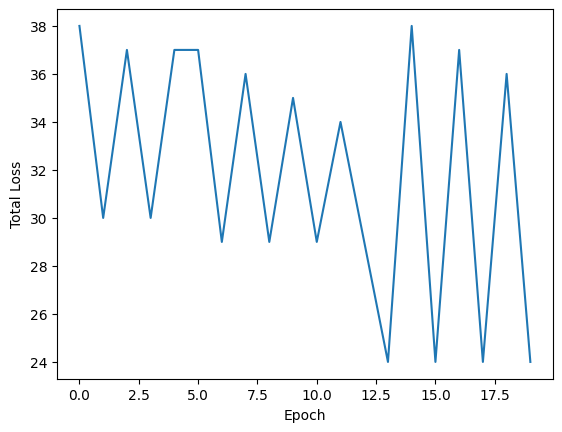

In [41]:
print(perceptron_algo_plot(X, y))
#If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

X1 = 0 0 1 1 , X2= 0 1 0 1 and Y = -1 -1 -1 1 this is the logic of AND table and this data set is learnable for the perceptron beacuse this logic is linearly seperable The negative samples (Y = −1) are at points: (0, 0), (0, 1), (1, 0).The positive sample (Y = +1) is at the point (1, 1). as we can draw the decision boundary between positive and negative values the dataset is learnable


---
The Perceptron learning rule involves updating the weights whenever there is a misclassification. The weight update rule is given by:
w=w+η⋅y⋅x
where:

𝑤

*  w is the weight vector
*  η is the learning rate
*  y is the true label (target)
*  x is the input vector


w0=[0,0] and b0=0

Sample 1:
x=(0,0),y=-1
* predicted output: ycap = sign(w1.x1+w2.x2+b)=sign(0.0+0.0+0)=0
* as ycap<=0 so, w1=w1+eta.(y).x1=0+eta.-1.0=0 , w2=w2+eta.(y).x2=0 , b=b+eta.y=-eta
* the updated weights is w=[0,0] and b=-eta.

Sample 2:x=(0,1) , y=-1
* Predicted out put : ycap=sign(w1.x1+w2.x2+b)=sign(0.0+0.1-eta)=-eta=-1
* as predicted output = real output no updation is needed

Sample 3: x=(1,0) , y=-1
* Predicted output : ycap=sign(w1.x1+w2.x2=b)=sign(0.1+0.0+-eta)=-1
* No updation needed

Sample 4: x=(1,1),y=1
* Predicted output: ycap=sign(w1.x1+x2.x2+b)=sign(0.1+0.1+-eta)=-1
* w1=w1+y.eta.x1=0+1.eta.1=eta, w2=w2+y.eta.x2=0+1.eta.1=eta , b=b+eta.y=-eta+eta.1=0
* so, the updated weights as w=[eta,eta] and b=0

Epoach 2:


Sample 1:
x=(0,0),y=-1
* predicted output: ycap = sign(w1.x1+w2.x2+b)=sign(eta.0+eta.0+0)=0
* as ycap<=0 so, w1=w1+eta.(y).x1=eta+eta.-1.0=0 , w2=w2+eta.(y).x2=0 , b=b+eta.y=-eta
* the updated weights is w=[eta,eta] and b=-eta.


Sample 2: x=(0,1) , y=-1
* Predicted out put : ycap=sign(w1.x1+w2.x2+b)=sign(eta.0+eta.1-eta)=0
* Updated is w1=w1+eta.x1.y=eta+eta.0.-1=eta, w2=w2+eta.x2.y=0, b=b+eta.y = -eta-eta = -2eta
* The updated values are w=[eta,0] and b=-2eta

Sample 3: x=(1,0) , y=-1
* Predicted output : ycap=sign(w1.x1+w2.x2=b)=sign(eta.1+0.0+-2eta)=-1
* No updation needed

Sample 4: x=(1,1),y=1
* Predicted output: ycap=sign(w1.x1+x2.x2+b)=sign(eta.1+0.1+-2eta)=-1
* w1=w1+y.eta.x1=eta+1.eta.1=2eta, w2=w2+y.eta.x2=0+1.eta.1=eta , b=b+eta.y=-2eta+eta.1=-eta
* so, the updated weights as w=[2eta,eta] and b=-eta



Boolean Functions Over 2-Bit Binary Inputs:
The input space consists of two binary variables
𝑥1 and 𝑥2, and each can take values 0 or 1. Therefore, the total number of possible input combinations is: 2square=4

For each input combination, the corresponding output y can be either 0 or 1 (or in the case of the Perceptron, it can also be encoded as -1 and +1). Thus, for each of the 4 inputs, we can assign any of the two possible outputs, leading to a total of: 2power4=16

The Perceptron is a linear classifier, meaning it can only learn functions that are linearly separable. For a function to be linearly separable, there must exist a linear decision boundary that can correctly classify all points in the dataset. Therefore, a learnable boolean function is one where the positive and negative examples can be separated by a straight line in a 2D space (i.e., the inputs).

Linear Separability of Boolean Functions:
For functions with 2-bit inputs (i.e., four input combinations), we can categorize them based on their learnability by the Perceptron:

Functions Learnable by Perceptron (Linearly Separable):


AND:
(
0
,
0
)
->
0
,
(
0
,
1
)
->
0
,
(
1
,
0
)
->
0
,
(
1
,
1
)
->
1

(0,0)→0, (0,1)→0, (1,0)→0, (1,1)→1
This function is linearly separable.

OR:
(
0
,
0
)
->
0
,
(
0
,
1
)
->
1
,
(
1
,
0
)
->
1
,
(
1
,
1
)
->
1

(0,0)→0, (0,1)→1, (1,0)→1, (1,1)→1
This function is linearly separable.

NAND:
(
0
,
0
)
->
1
,
(
0
,
1
)
->
1
,
(
1
,
0
)
-->
1
,
(
1
,
1
)
->
0

(0,0)→1, (0,1)→1, (1,0)→1, (1,1)→0
This function is linearly separable.

NOR:
(
0
,
0
)
->
1
,
(
0
,
1
)
->
0
,
(
1
,
0
)
->
0
,
(
1
,
1
)
->
0

(0,0)→1, (0,1)→0, (1,0)→0, (1,1)→0
This function is linearly separable.

XOR:
(
0
,
0
)
->
0
,
(
0
,
1
)
->
1
,
(
1
,
0
)
->
1
,
(
1
,
1
)
->
0

(0,0)→0, (0,1)→1, (1,0)→1, (1,1)→0
Not learnable by Perceptron (not linearly separable).

XNOR:
(
0
,
0
)
->
1
,
(
0
,
1
)
->
0
,
(
1
,
0
)
->
0
,
(
1
,
1
)
->
1

(0,0)→1, (0,1)→0, (1,0)→0, (1,1)→1
Not learnable by Perceptron (not linearly separable).

Truth Tables of Non-Learnable Boolean Functions (Not Linearly Separable):
XOR (not learnable):

X1 = 0 0 1 1 , X2 = 0 1 0 1 , Y = XOR(X1,X2) = 0 1 1 0

XNOR (not learnable):

X1= 0 0 1 1 , X2 = 0 1 0 1 , Y = XNOR(X1,X2) = 1 0 0 1